In [18]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train.shape

ImportError: dlopen(/Users/pushpesh/Library/Python/3.8/lib/python/site-packages/tensorflow/python/data/experimental/service/_pywrap_server_lib.so, 2): Symbol not found: __ZN10tensorflow4data27DataServiceDispatcherClient14GetElementSpecExRNSt3__112basic_stringIcNS2_11char_traitsIcEENS2_9allocatorIcEEEE
  Referenced from: /Users/pushpesh/Library/Python/3.8/lib/python/site-packages/tensorflow/python/data/experimental/service/_pywrap_server_lib.so
  Expected in: /Users/pushpesh/Library/Python/3.8/lib/python/site-packages/tensorflow/python/_pywrap_tensorflow_internal.so
 in /Users/pushpesh/Library/Python/3.8/lib/python/site-packages/tensorflow/python/data/experimental/service/_pywrap_server_lib.so

In [ ]:
print(x_train[0])

NameError: name 'x_train' is not defined

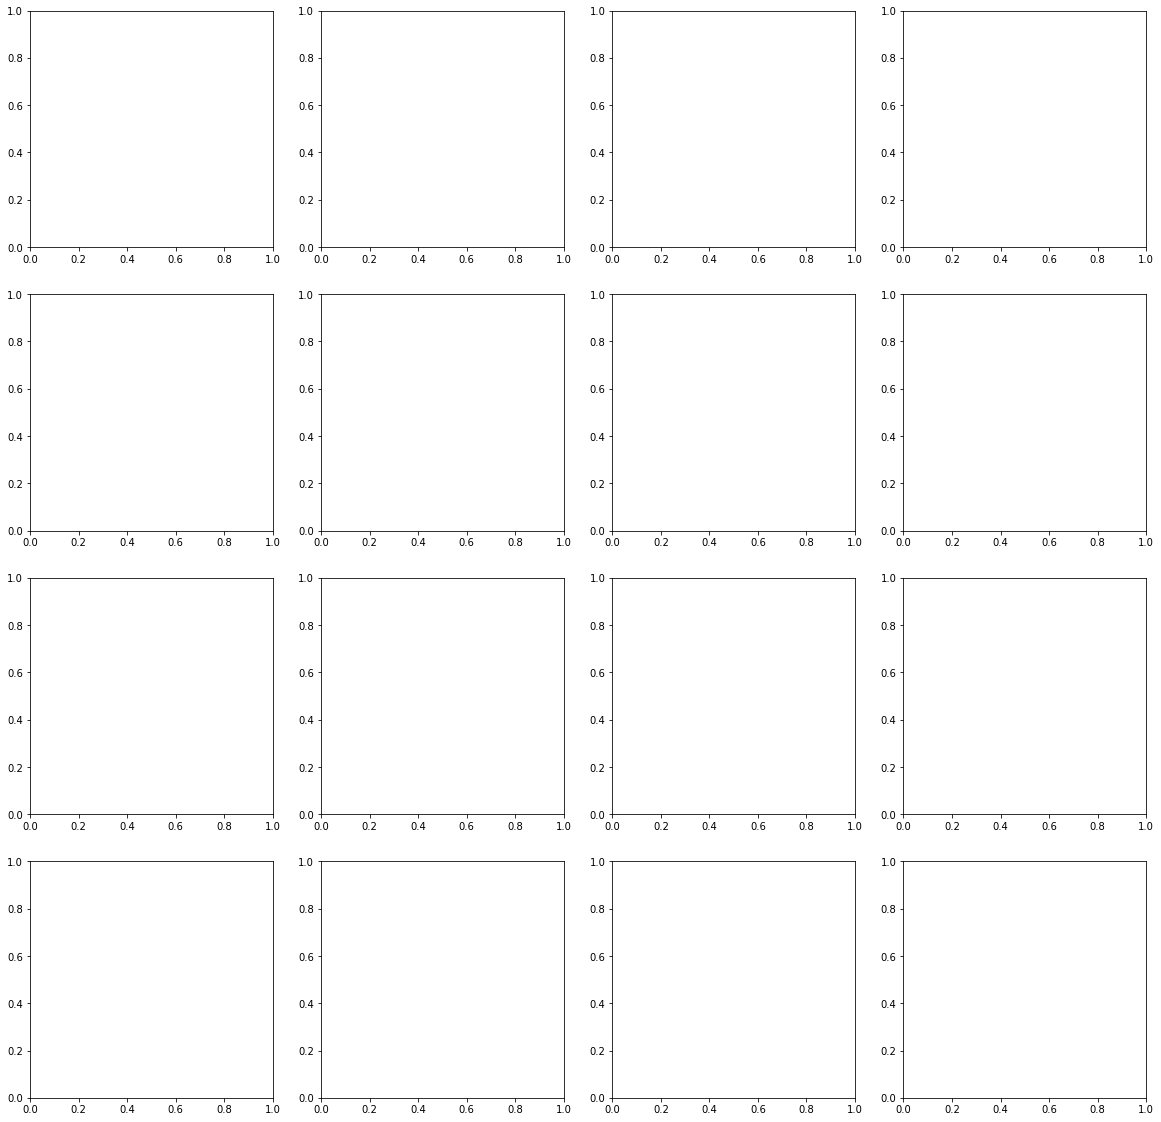

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, axs = plt.subplots(4, 4, figsize = (20, 20))
plt.gray()
for i, ax in enumerate(axs.flat):
    ax.matshow(x_train[i])
    ax.axis('off')
    ax.set_title('Number {}'.format(y_train[i]))
fig.show()

In [ ]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
print(x_train.ndlm)

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=3)

In [ ]:
model.evaluate(x_test, y_test)